In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [27]:
#read images
train_img=cv2.imread('img1.jpg')
test_img=cv2.imread('img2.jpg')

In [28]:
first_img=np.asarray(train_img,dtype=np.uint8)
second_img=np.asarray(test_img,dtype=np.uint8)

In [29]:
original_img1 = cv2.cvtColor(first_img, cv2.COLOR_BGR2RGB)
original_img2 = cv2.cvtColor(second_img, cv2.COLOR_BGR2RGB)

Text(0.5, 1.0, 'original image 1')

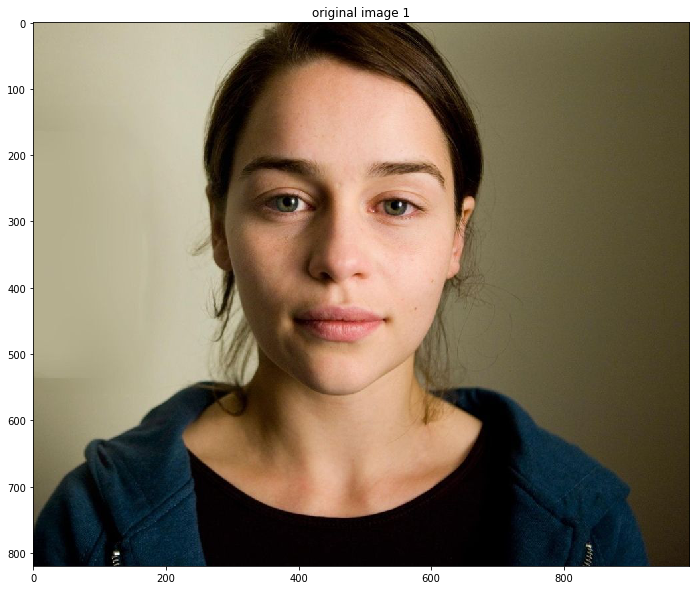

In [30]:
plt.figure(figsize=(20,10))
plt.imshow(original_img1)
plt.title("original image 1")

Text(0.5, 1.0, 'original image 2')

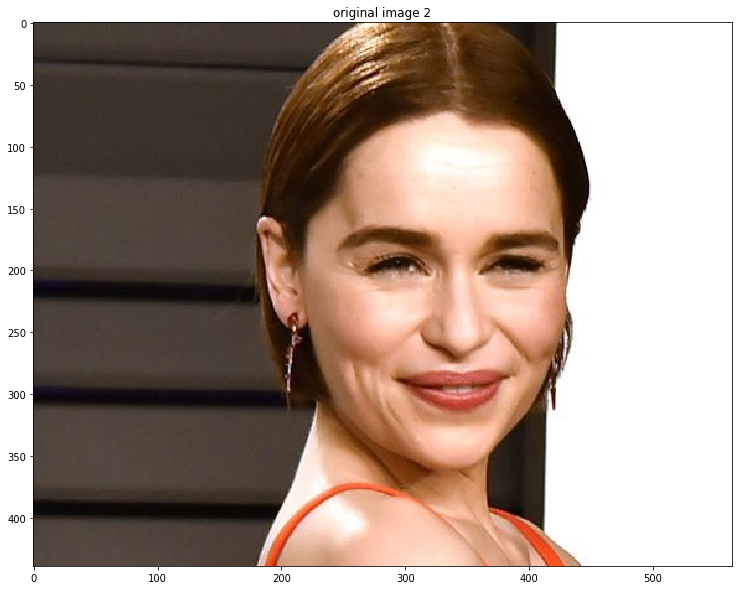

In [31]:
plt.figure(figsize=(20,10))
plt.imshow(original_img2)
plt.title("original image 2")

In [32]:
#changing to gray scale
gray_img1 = cv2.cvtColor(train_img, cv2.COLOR_BGR2GRAY)
gray_img2 = cv2.cvtColor(second_img, cv2.COLOR_BGR2GRAY)

Text(0.5, 1.0, 'GRAY SCALE image 1')

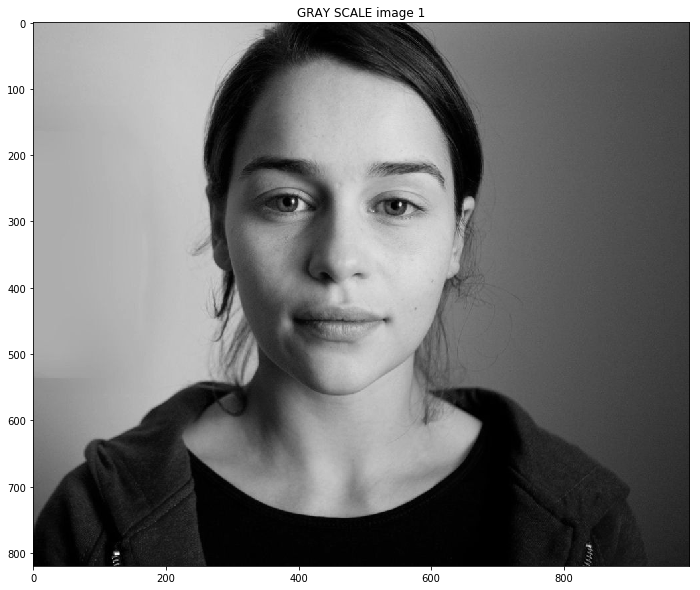

In [33]:
plt.figure(figsize=(20,10))
plt.imshow(gray_img1,cmap=plt.get_cmap('gray'))
plt.title("GRAY SCALE image 1")

Text(0.5, 1.0, 'GRAY SCALE image 2')

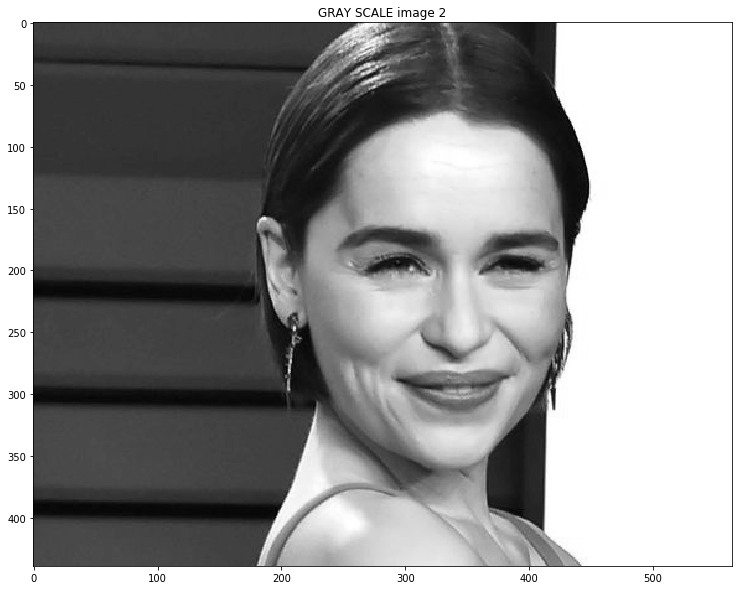

In [34]:
plt.figure(figsize=(20,10))
plt.imshow(gray_img2,cmap=plt.get_cmap('gray'))
plt.title("GRAY SCALE image 2")

In [35]:
#creating surf object
surf=cv2.xfeatures2d.SURF_create(400)

In [36]:
#GETTING ALL THE KEYPOINTS AND DESCRIPTORS OF BOTH THE IMAGE
kp1,des1=surf.detectAndCompute(gray_img1,None)
kp2,des2=surf.detectAndCompute(gray_img2,None)

In [37]:
print(len(kp1))
print(len(kp2))

438
382


In [38]:
train_image1=cv2.drawKeypoints(gray_img1,kp1,None,(225,0,0),4)
test_image1=cv2.drawKeypoints(gray_img2,kp2,None,(225,0,0),4)

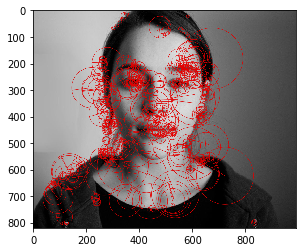

In [39]:
plt.imshow(train_image1,cmap=plt.get_cmap('gray'))

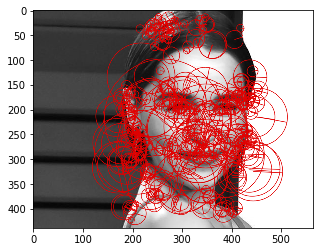

In [40]:
plt.imshow(test_image1,cmap=plt.get_cmap('gray'))

In [41]:
#applyilng U-surf so that it won't find orientation
#surf.getUpright()

In [42]:
#surf.setUpright(True)

In [43]:
#surf.getUpright()

In [44]:
#recomputing the features points
#kp1=surf.detect(train_img,None)
#train_image1=cv2.drawKeypoints(train_img,kp1,None,(225,0,0),4)
#plt.imshow(train_image1,cmap=plt.get_cmap('gray'))

In [45]:
#kp2=surf.detect(test_img,None)
#test_image1=cv2.drawKeypoints(test_img,kp2,None,(225,0,0),4)
#plt.imshow(test_image1,cmap=plt.get_cmap('gray'))

In [47]:
surf.descriptorSize()

64

In [48]:
#surf.extended(128)

In [53]:
bf=cv2.BFMatcher(cv2.NORM_L2)

In [54]:
matches=bf.knnMatch(des1,des2,k=2)
matches[:3]

[[<DMatch 0C19FE18>, <DMatch 0CAA8F80>],
 [<DMatch 0CACDE60>, <DMatch 0A859CB0>],
 [<DMatch 0A8596F8>, <DMatch 0A859ED8>]]

In [55]:
len(matches)

438

In [27]:
#matches=sorted(matches,key = lambda x:x.distance)

In [56]:
#applying ratio test
good=[]
for m,n in matches:
    if m.distance<0.8*n.distance:
        good.append([m])
print(good[:3])

[[<DMatch 0CACC020>], [<DMatch 0CACC050>], [<DMatch 0CACC260>]]


In [57]:
img3=cv2.drawMatchesKnn(train_img,kp1,test_img,kp2,matches,None,flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

In [34]:
#plt.figure(figsize=(20,10))
#plt.imshow(img3,cmap=plt.get_cmap('gray'))

In [76]:
img3=cv2.drawMatchesKnn(train_img,kp1,test_img,kp2,good,None,flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

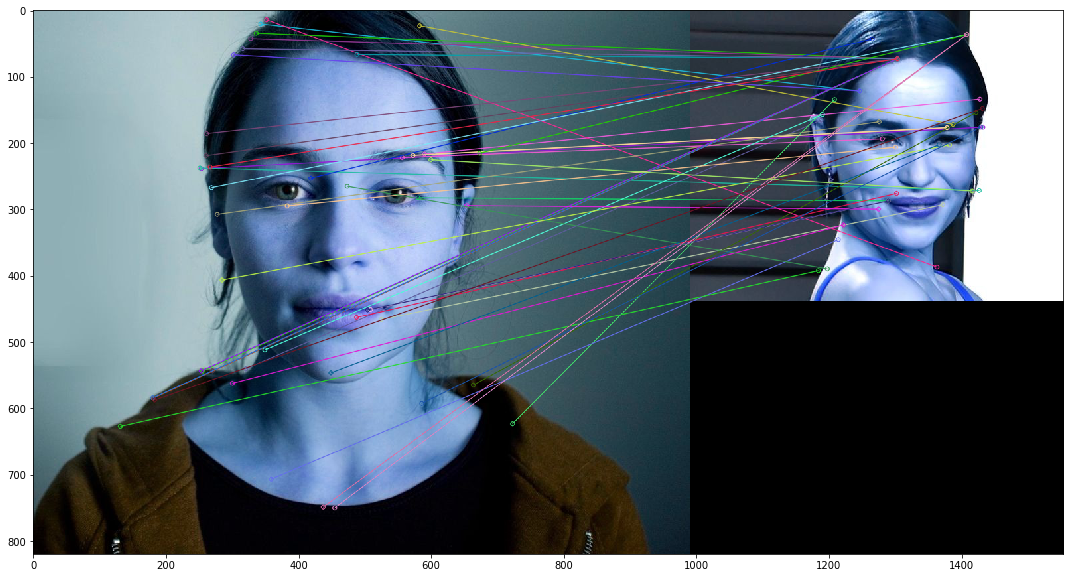

In [77]:
plt.figure(figsize=(20,10))
plt.imshow(img3)

In [78]:
len(good)

48

In [79]:
#using FLANN based keypoints and descriptors
FLANN_INDEX_KDTREE=1

index_params=dict(algorithm=FLANN_INDEX_KDTREE,trees=5)
search_params=dict(checks=50)#we can pass empty dictionoary too

flann=cv2.FlannBasedMatcher(index_params,search_params)
matches=flann.knnMatch(des1,des2,k=2)

#need to draw only good matches
matchesMask=[[0,0] for i in range(len(matches))]

for j,(m,n) in enumerate(matches):
    if m.distance<0.7*n.distance:
        matchesMask[j]=[1,0]
        
draw_params=dict(matchColor=(0,255,0),singlePointColor=(255,0,0),matchesMask=matchesMask,flags=cv2.DrawMatchesFlags_DEFAULT)        

img4=cv2.drawMatchesKnn(train_img,kp1,test_img,kp2,matches,None,**draw_params)



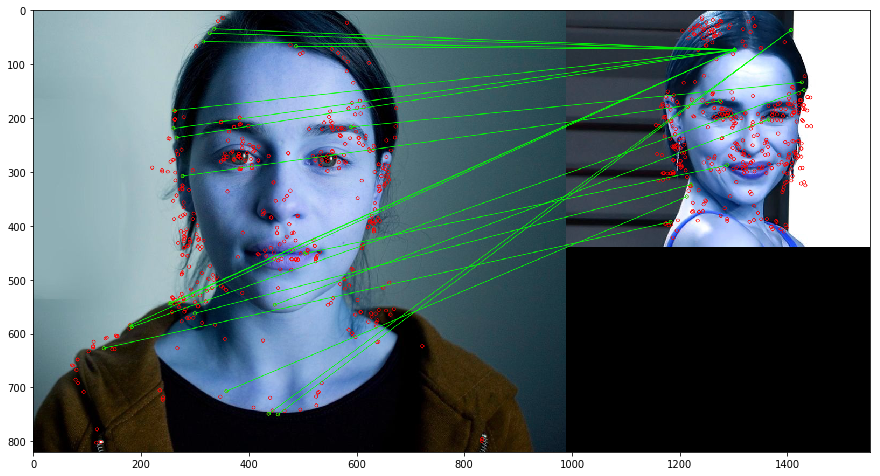

In [80]:
plt.figure(figsize=(15,15))
plt.imshow(img4)